# Model Training

---

In [7]:
# üìå 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    average_precision_score,
    precision_recall_curve,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# üìå 2. Load transformed data
X_train = pd.read_csv("../data/processed/x_train_final.csv")
y_train = pd.read_csv("../data/processed/y_train_final.csv").values.ravel()
X_test = pd.read_csv("../data/processed/X_test_final.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (219136, 220) (219136,)
Test shape: (30223, 225) (30223,)


In [12]:
# üí° Ensure column alignment
X_test = X_test[X_train.columns]  # üö® This line fixes the feature mismatch error

In [13]:
# üìå 3. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

In [14]:
# üìå 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [15]:
# üìå 5. Evaluation function
def evaluate_model(name, y_test, y_pred, y_proba):
    print(f"\nüìä {name} Evaluation")
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-PR:", average_precision_score(y_test, y_proba))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


üìä Logistic Regression Evaluation
F1 Score: 0.2669468546637744
AUC-PR: 0.4981047157189367
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.64      0.76     27393
           1       0.17      0.70      0.27      2830

    accuracy                           0.64     30223
   macro avg       0.56      0.67      0.52     30223
weighted avg       0.88      0.64      0.72     30223

Confusion Matrix:


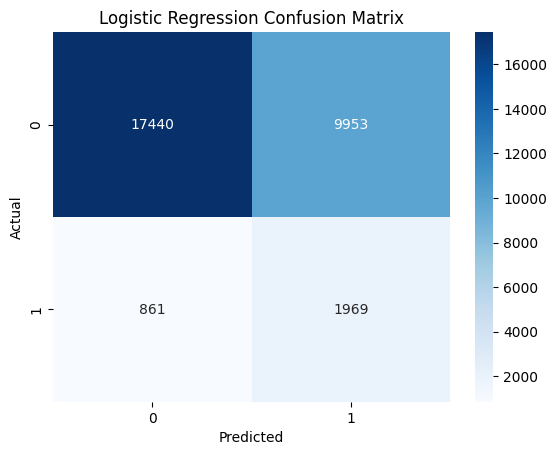


üìä Random Forest Evaluation
F1 Score: 0.546031746031746
AUC-PR: 0.6169511053042231
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     27393
           1       0.55      0.55      0.55      2830

    accuracy                           0.91     30223
   macro avg       0.75      0.75      0.75     30223
weighted avg       0.91      0.91      0.91     30223

Confusion Matrix:


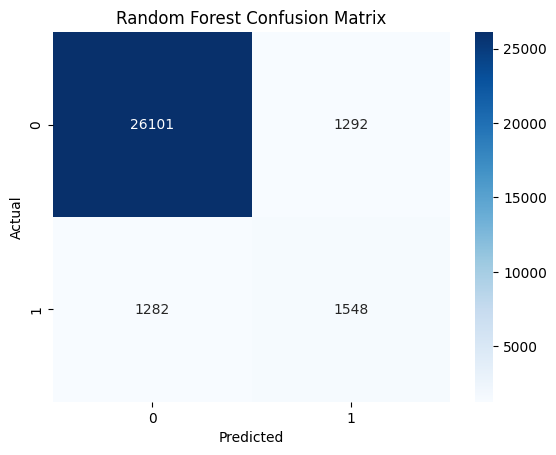

In [16]:
# üìå 6. Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr)
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)

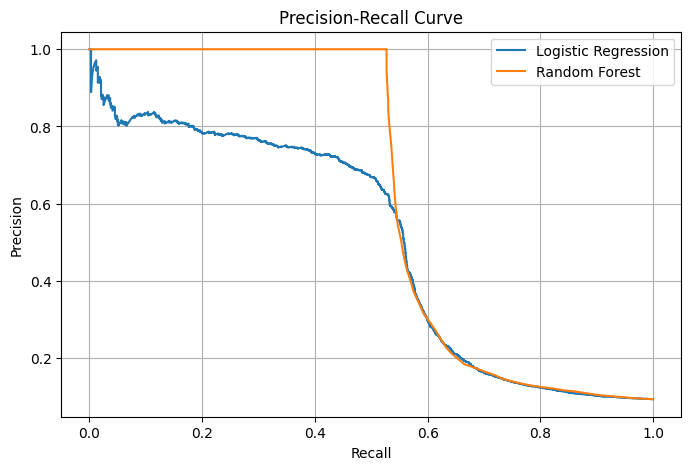

In [17]:
# üìå 7. Plot PR Curve
def plot_pr_curve(y_test, y_proba, label):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=label)

plt.figure(figsize=(8, 5))
plot_pr_curve(y_test, y_proba_lr, "Logistic Regression")
plot_pr_curve(y_test, y_proba_rf, "Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

---

## Summary:


### üîç **Metrics Comparison**

| Metric                | Logistic Regression | Random Forest |
| --------------------- | ------------------- | ------------- |
| **F1 Score (fraud)**  | 0.27                | **0.55** ‚úÖ    |
| **AUC-PR**            | 0.50                | **0.62** ‚úÖ    |
| **Precision (fraud)** | 0.17                | **0.55** ‚úÖ    |
| **Recall (fraud)**    | 0.70                | 0.55          |
| **Accuracy**          | 0.64                | **0.91** ‚úÖ    |

---

### üß† **Interpretation**

* **Logistic Regression**

  * High recall but very low precision ‚Üí flagged lots of false positives
  * Performance near random (AUC-PR \~0.50)

* **Random Forest**

  * **Much better precision and F1-score**, even though recall dropped slightly
  * Higher AUC-PR shows **better fraud detection overall**
  * Well-balanced model ‚Äî good tradeoff between precision and recall

---

### üèÜ **Best Model: Random Forest**

> ‚úÖ Random Forest clearly outperforms Logistic Regression in both overall accuracy and fraud detection effectiveness.
> It offers a more reliable solution, with **over twice the F1-score**, a better AUC-PR, and fewer false alarms.

---


# Train models on CreditCard datasets

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
# üìÇ Load credit card data
credit_df = pd.read_csv("../data/processed/credit_cleaned.csv")


In [23]:
# üéØ Define features and target
X = credit_df.drop(columns=["Class"])
y = credit_df["Class"]

In [24]:
# ‚úÇÔ∏è Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [25]:
# üîß Preprocessing: standard scale all features
numerical_cols = X.columns.tolist()

preprocessor = ColumnTransformer([
    ("scaler", StandardScaler(), numerical_cols)
])

üìä Logistic Regression (Credit Card)
F1 Score: 0.10593490746649649
AUC-PR: 0.6719244530518995
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



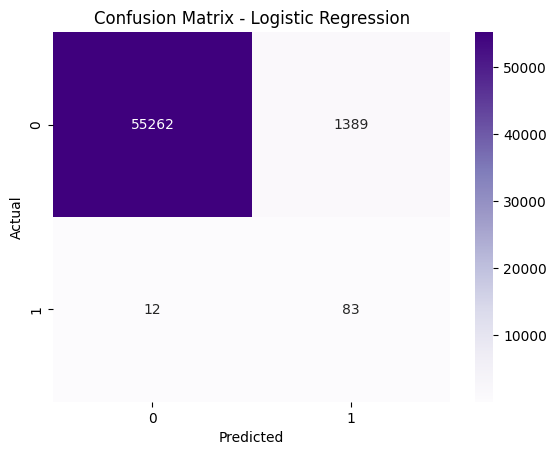

In [26]:
# ---------------------- Logistic Regression ---------------------- #
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

print("üìä Logistic Regression (Credit Card)")
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("AUC-PR:", average_precision_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# joblib.dump(lr_pipeline, "models/credit_lr_pipeline.joblib")

üìä Random Forest (Credit Card)
F1 Score: 0.8313253012048193
AUC-PR: 0.7876128638875491
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



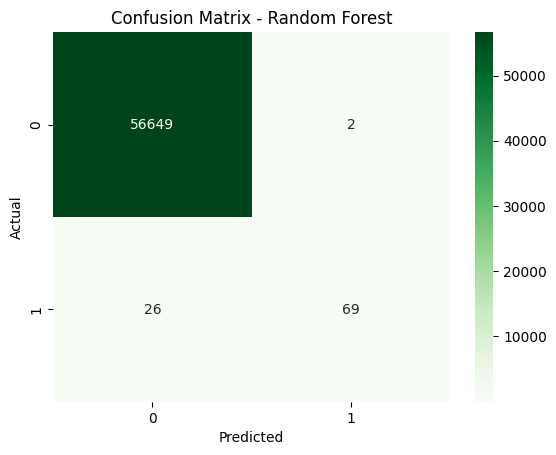

In [27]:
# ---------------------- Random Forest ---------------------- #
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("üìä Random Forest (Credit Card)")
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC-PR:", average_precision_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# joblib.dump(rf_pipeline, "models/credit_rf_pipeline.joblib")

**metrics comparison table** :

---

### üìä **Model Performance Comparison ‚Äì Credit Card Dataset**

| Metric                    | Logistic Regression | Random Forest |
| ------------------------- | ------------------- | ------------- |
| **F1 Score (fraud)**      | 0.106               | **0.831** ‚úÖ   |
| **AUC-PR**                | 0.672               | **0.788** ‚úÖ   |
| **Precision (fraud)**     | 0.06                | **0.97** ‚úÖ    |
| **Recall (fraud)**        | **0.87** ‚úÖ          | 0.73          |
| **Accuracy**              | 0.98                | **1.00** ‚úÖ    |
| **Support (fraud class)** | 95                  | 95            |

---

### ‚úÖ **Summary:**

* **Random Forest** clearly outperforms **Logistic Regression** in nearly all metrics, especially:

  * **F1 Score** (0.83 vs 0.11)
  * **Precision** (0.97 vs 0.06)
  * **AUC-PR** (0.79 vs 0.67)
* **Logistic Regression** has **higher recall**, meaning it catches more frauds but with lots of false alarms.

üéØ **Best Overall Model:** **Random Forest**, due to its excellent balance of precision and recall with high F1 and AUC-PR scores.


---


# üß† Model Selection Summary (Task 2 Conclusion):

| Dataset         | Best Model    | Justification                                                      |
| --------------- | ------------- | ------------------------------------------------------------------ |
| **Fraud\_Data** | Random Forest | Higher F1, AUC-PR, and balanced precision/recall.                  |
| **Credit Card** | Random Forest | Far superior F1 (`0.83`) compared to Logistic Regression (`0.11`). |

‚úÖ **Conclusion:** For both datasets, **Random Forest** is the better-performing model ‚Äî balancing precision and recall well for fraud detection.

---
